# K-Next Neighbours
This project aims to develop a machine learning model capable of predicting medical costs based on given patient data.

**Dataset Despcription**

The features in the dataset are named as 1,2,3,5 ... so we will have to rename them in the preprocessing.

ID: A unique identifier for each patient (this feature is not used in analysis).
Clump Thickness: Measures the thickness of the clumps of cells. A higher value indicates a more substantial clump.

Uniformity of Cell Size: Reflects how consistent the size of the cells is. Higher values indicate a greater variation in cell sizes.

Uniformity of Cell Shape: Reflects how consistent the shape of the cells is. Higher values indicate more variation in cell shapes.

Marginal Adhesion: Describes how closely the cells stick to each other. A higher value suggests poor adhesion, which is often associated with malignancy.

Single Epithelial Cell Size: Measures the size of individual epithelial cells. Larger sizes can indicate malignancy.

Bare Nuclei: Counts the number of nuclei that are not surrounded by cytoplasm. More bare nuclei are typically associated with cancerous cells.

Bland Chromatin: Assesses the texture of the chromatin in the cell nuclei. Coarser textures are often linked to malignancy.

Normal Nucleoli: Reflects the presence of nucleoli in the cell. A higher count suggests abnormal nucleoli, which is a common characteristic of cancerous cells.
Mitoses: Counts the number of cells undergoing mitosis. A higher mitotic rate is an indicator of malignancy.

Class: The target variable, where 2 indicates benign and 4 indicates malignant.

In [1]:
!pip install opendatasets
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

Importing and downloading the dataset from kaggle

In [2]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/zzero0/uci-breast-cancer-wisconsin-original")

Skipping, found downloaded files in "./uci-breast-cancer-wisconsin-original" (use force=True to force download)


Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

Loading the dataset

In [4]:
df=pd.read_csv("/content/uci-breast-cancer-wisconsin-original/breast-cancer-wisconsin.data.txt")

## Explatory Visualizations and Data Cleaning

In [5]:
print(df.head())

   1000025  5   1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
0  1002945  5   4    4    5  7  10  3    2    1    2
1  1015425  3   1    1    1  2   2  3    1    1    2
2  1016277  6   8    8    1  3   4  3    7    1    2
3  1017023  4   1    1    3  2   1  3    1    1    2
4  1017122  8  10   10    8  7  10  9    7    1    4


Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns.

In [6]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

Drop redundant columns
We should drop any redundant columns from the dataset which does not have any predictive power. Here, Id is the redundant column.

In [7]:
df.drop('Id', axis=1, inplace=True)

In [8]:
print(df.head())

   Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0                5                     4                      4   
1                3                     1                      1   
2                6                     8                      8   
3                4                     1                      1   
4                8                    10                     10   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  5                            7          10   
1                  1                            2           2   
2                  1                            3           4   
3                  3                            2           1   
4                  8                            7          10   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                2        1      2  
1                3                1        1      2  
2                3                7        1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              698 non-null    int64 
 1   Uniformity_Cell_Size         698 non-null    int64 
 2   Uniformity_Cell_Shape        698 non-null    int64 
 3   Marginal_Adhesion            698 non-null    int64 
 4   Single_Epithelial_Cell_Size  698 non-null    int64 
 5   Bare_Nuclei                  698 non-null    object
 6   Bland_Chromatin              698 non-null    int64 
 7   Normal_Nucleoli              698 non-null    int64 
 8   Mitoses                      698 non-null    int64 
 9   Class                        698 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


We can see that there are 9 numerical variables and 1 categorical variable in the dataset. I will check the frequency distribution of values in the variables to confirm the same.

In [10]:
for var in df.columns:
    print(df[var].value_counts())

Clump_thickness
1     145
5     129
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     383
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     352
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     406
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     385
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     164
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

The distribution of values shows that data type of Bare_Nuclei is of type integer. But the summary of the dataframe shows that it is type object. So, I will explicitly convert its data type to integer.

In [11]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [12]:
df.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,float64
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


In [13]:
df.shape

(698, 10)

In [14]:
df.isnull().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,16
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0
Class,0


We can see that the Bare_Nuclei column contains missing values. As we have about 700 records we can afford to delete the 16 NULL values.

In [15]:
df = df.dropna()

In [16]:
print(df.describe())

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count       682.000000            682.000000             682.000000   
mean          4.441349              3.153959               3.218475   
std           2.822751              3.066285               2.989568   
min           1.000000              1.000000               1.000000   
25%           2.000000              1.000000               1.000000   
50%           4.000000              1.000000               1.000000   
75%           6.000000              5.000000               5.000000   
max          10.000000             10.000000              10.000000   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count         682.000000                   682.000000   682.000000   
mean            2.832845                     3.236070     3.548387   
std             2.865805                     2.224214     3.645226   
min             1.000000                     1.000000     1.000000   
25%       

**Summary of variables**

1. There are 10 numerical variables in the dataset.
2. All of the variables are of discrete type.
3. Out of all the 10 variables, the first 9 variables are feature variables and last variable *Class* is the target variable.

Now to see the frequency distribution of the Class feature(predicted value)

In [17]:
df['Class'].value_counts()

,count
Class,
2,443
4,239


In [18]:
df['Class'].value_counts()/float(len(df))

,count
Class,
2,0.64956
4,0.35044


So there is a 35-65 spilt for benign vs malignent tumors.

We don't need to worry about outliers for this model as k-NN is robust to outliers

Checking distribution of all variables(all are discrete)

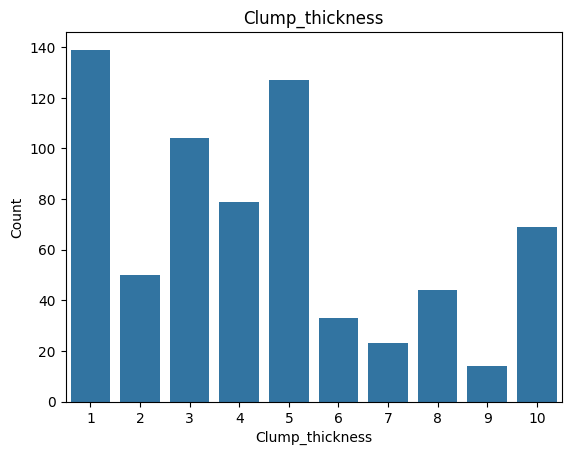

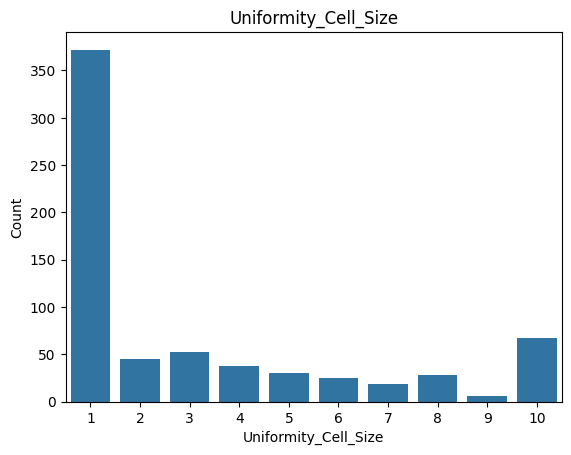

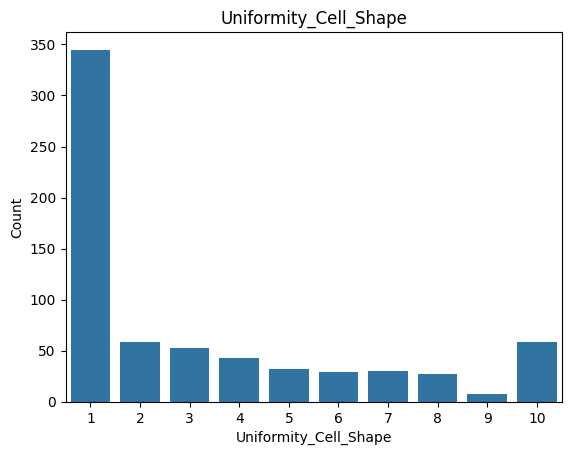

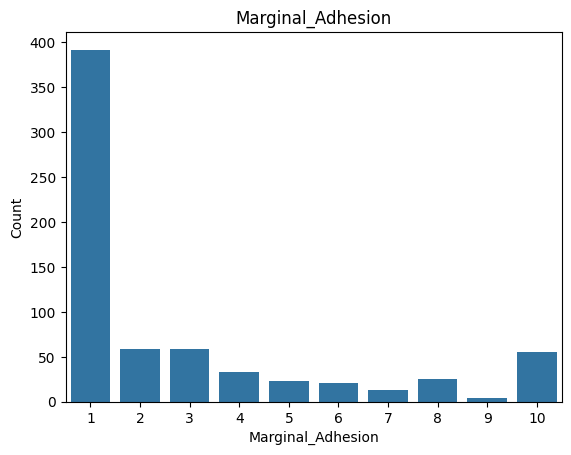

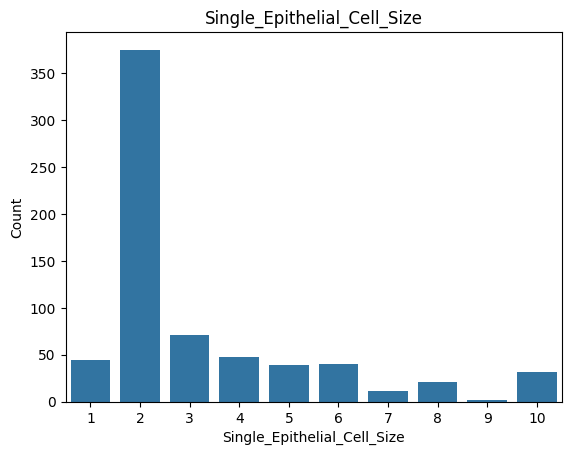

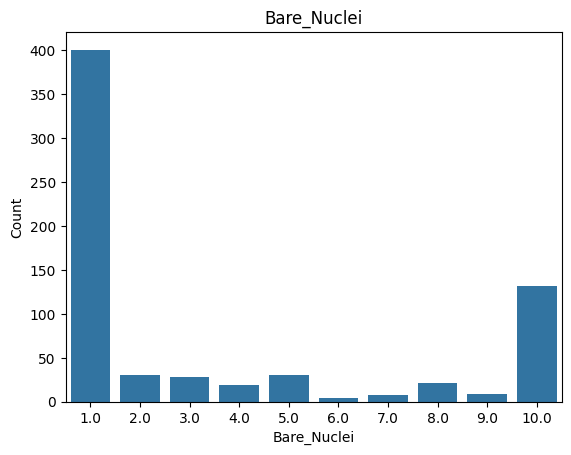

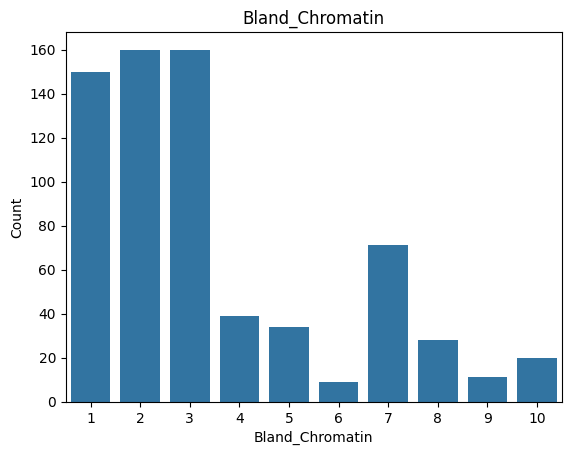

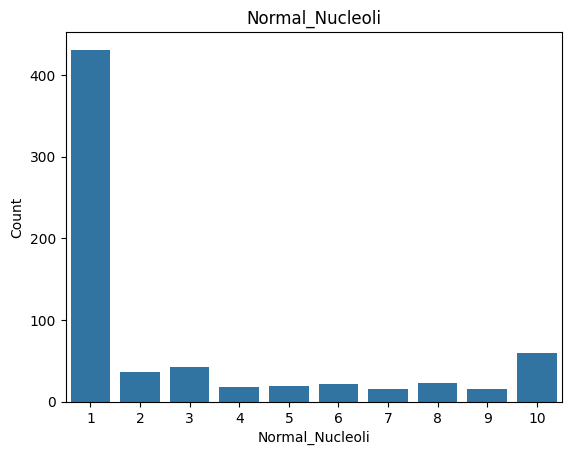

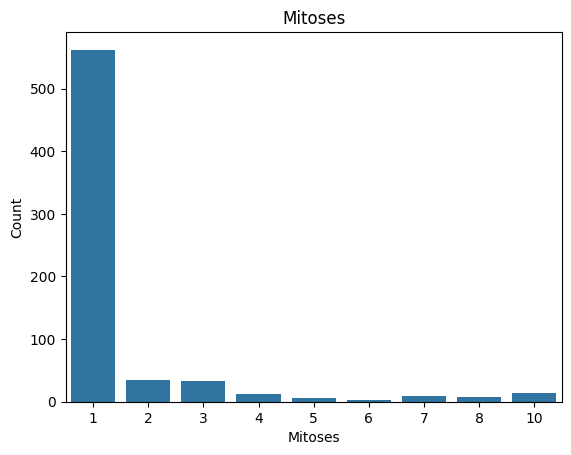

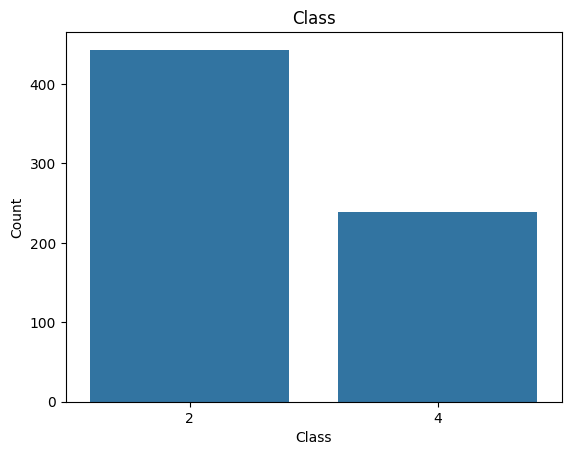

In [19]:
for featue in df.columns:
    sns.countplot(data=df, x=featue)
    plt.xlabel(featue)
    plt.ylabel("Count")
    plt.title(featue)
    plt.show()

From this we can deduce that all features are heavily skewed to the left.

Now we wil find the correlation between the multiple features to judge their relavance in the model

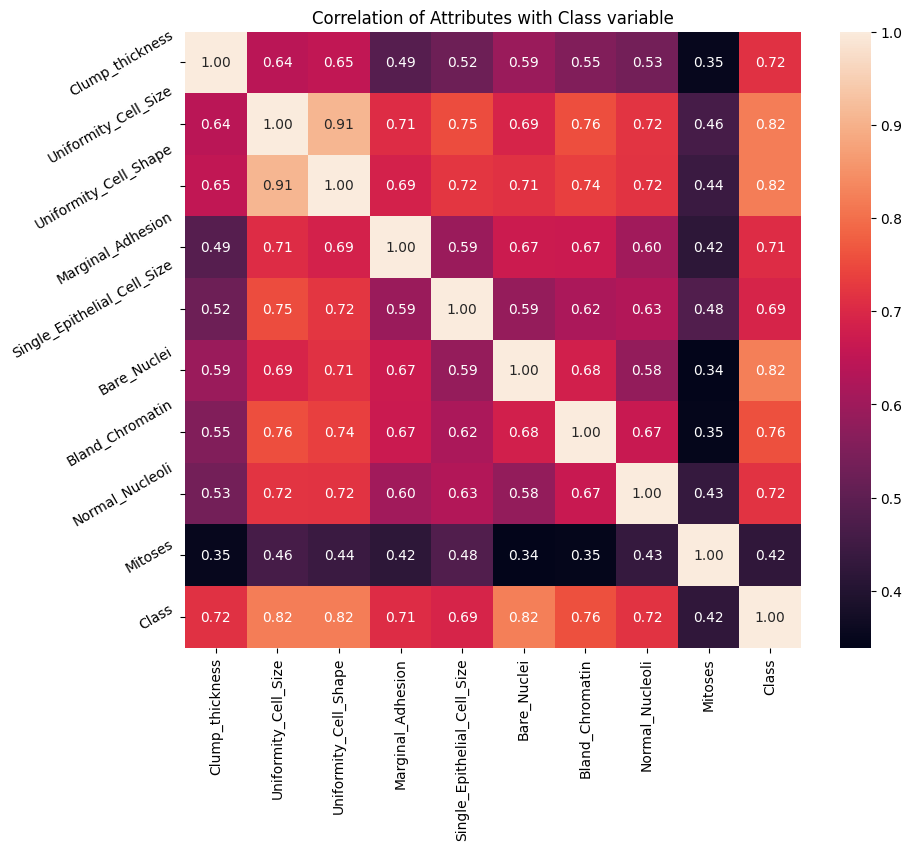

In [20]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

Features like *Bare Nuclei,* *Uniformity of Cell Size,* and *Uniformity of Cell Shape* have high positive correlations (around 0.82) with the *Class* variable, meaning they are strongly related to whether a tumor is benign or malignant.

*Mitoses* has the lowest correlation with the *Class* variable (0.42), suggesting it is less effective in predicting of the tumor class compared to other features.

*Uniformity of Cell Size* and *Uniformity of Cell Shape* have a high correlation of 0.91, suggesting that these two features are closely related. This could suggest there is a redundancy in the data however due to the lack of data there is no point in elminating the features

## Modelling

In [21]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

I will choose the best number of neighbours for the k-NN algorithm using the elbow graph technique

In [24]:
error_rate = []

for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, y_pred))

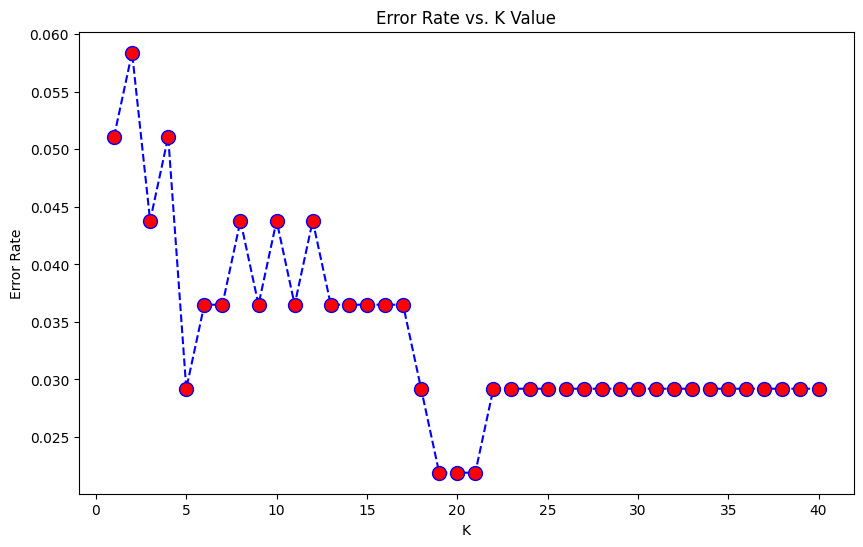

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

As we can clearly see, creating the model with 19 neighbours gives us the lowest error rate. I could test with less neighbours as we can see the graph trending downwards at 5 but the lesser neighbours we test with the more we run a chance of over fitting. So we will create the final model with 19 neighbours.

In [26]:
knn = KNeighborsClassifier(n_neighbors=19)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

## Performance Metrics

In [28]:
y_pred = knn.predict(X_test)

Confusion Matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [29]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[90  2]
 [ 1 44]]

True Positives(TP) =  90

True Negatives(TN) =  44

False Positives(FP) =  2

False Negatives(FN) =  1


Accuracy

In [30]:
print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.9781021897810219


**Classification Report**

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

**Precision**

Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP).

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically, precision can be defined as $TP / (TP + FP)$.

**Recall**

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be defined as $TP / (TP + FN)$.

**f1-score**

f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        92
           4       0.96      0.98      0.97        45

    accuracy                           0.98       137
   macro avg       0.97      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



Checking for overfitting

In [32]:
y_train_pred = knn.predict(X_train)

print("Train accuracy", accuracy_score(y_train, y_train_pred))
print("Test accuracy", accuracy_score(y_test, y_pred))

Train accuracy 0.9706422018348624
Test accuracy 0.9781021897810219


Overall as we can see we have got an amazing model with amazing accuracy of 97%. As we can also see there is no overfitting as test and train accuracies are very similar.